# About Project

Aim: With the sentiment analysis method, we will find that a comment text contains positive or negative emotions. 

The sentiment of reviews is binary.

25000 lines of data consisting of movie reviews will be used in the project.

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review


# Import libraries and data

pip install nltk

In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS 
import plotly.express as px
import plotly as py

import plotly.offline as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import nltk
from collections import Counter # for most common word
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer # for lemmatization
import scapy

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv('/Users/skaraderili/PycharmProjects/sentimentProject/labeledTrainData.tsv.zip', sep="\t")

In [4]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
# test = pd.read_csv('/Users/skaraderili/PycharmProjects/sentimentProject/testData.tsv.zip', sep="\t")

In [6]:
# test.head()

Train set: First 20000 row.


Test set: Last 5000 row.

In [7]:
test = train[20000:]

In [8]:
train = train[:20000]

In [9]:
test.head()

,id,sentiment,review
20000,3862_4,0,"I just watched it. A couple of laughs, but not..."
20001,674_10,1,"While to most people watching the movie, this ..."
20002,8828_10,1,I was so glad I came across this short film. I...
20003,2963_8,1,The creators of south park in their own film h...
20004,2483_1,0,"Unspeakably discombobulated turkey, a mix of a..."


# Data Cleaning 

In [10]:
print("Shape of train data: ", train.shape) 
print("Shape of test data: ", test.shape)

Shape of train data:  (20000, 3)
Shape of test data:  (5000, 3)


In [11]:
train["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### Remove punctuations

In [12]:
print("We well remove this punctuations: ",string.punctuation)

We well remove this punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
# Remove punctuations from train set.
def remove_punct(text):
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub('[0-9]', ' ', text)
    return text

In [14]:
# Apply remove punctuation function.
train["review"] = train["review"].apply(lambda x: remove_punct(x))
test["review"] = test["review"].apply(lambda x: remove_punct(x))

In [26]:
test.head()

,id,sentiment,review
20000,3862_4,0,I just watched it A couple of laughs but nothi...
20001,674_10,1,While to most people watching the movie this w...
20002,8828_10,1,I was so glad I came across this short film Im...
20003,2963_8,1,The creators of south park in their own film h...
20004,2483_1,0,Unspeakably discombobulated turkey a mix of an...


In [52]:
train["review"][13]

'I had a feeling that after Submerged this one wouldnt be any better I was right He must be looking for champagne money and not care about the final product his voice gets repeatedly dubbed over by a stranger that sounds nothing like him the editing is  well  just a grade above amateurish Its nothing more than a B or Cgrade movie with just enough money to hire a couple talented cameramen and an OK sound designerbr br Like the previous poster said the problems seem to appear in postproduction voice dubbing etc Too bad cause the plots actually OK for a SG flickbr br Ill never rent another SG flick unless he emails me asking for forgivenessbr br Too bad  I miss Kelly LeBrockbr br jimbo'

### Make lower.

In [14]:
# Lower all letters.
train['review'] = train['review'].str.lower()
test['review'] = test['review'].str.lower()

### Remove stopwords.

In [15]:
# We'll remove stopwords with using nltk library.
stopwords = nltk.corpus.stopwords.words('english')
stopword = set(stopwords)
stopword = stopword.union(set(['a', 'i', 'mr', 'ms', 'mrs', 'one', 'two', 'said', 'br',"''","'"]))
# Also we can use beautiful soap for html things like "<br>". But I prefer add to stopwords because easy.

In [16]:
# Remove stopwords.
train["review"] = train["review"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
test["review"] = test["review"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

### Delete the less common words 

**Assumption:** If a word is written less than 10 times in the whole data, that word is misspelled. 

In [17]:
# Calculate the frequency of words.
word_freq = (train["review"].str.split(expand =True)
      .stack()
      .value_counts()
      .rename_axis('vals')
      .reset_index(name ='count'))
# Add less than 10 entries to the set.
del_word = set(word_freq[word_freq["count"] <= 10].vals)

# Remove.
train["review"] = train["review"].apply(lambda x: " ".join(x for x in x.split() if x not in del_word))
test["review"] = test["review"].apply(lambda x: " ".join(x for x in x.split() if x not in del_word))

In [46]:
word_freq.tail(30)

,vals,count
104745,burgerchain,1
104746,weisss,1
104747,fevera,1
104748,rugbr,1
104749,spaceout,1
104750,idling,1
104751,godzillaimitators,1
104752,complianceas,1
104753,britishborn,1
104754,holoband,1


### Porter stemming

The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. 
Advantages obviously include shortening the vocabulary space, thus drastically **improving the size of the index (or feature space)**. Strictly dictionary based or rule based stemmers (e.g. Porter stemmer) are very **fast**.

In [18]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [19]:
#Apply function on review column
train['review']=train['review'].apply(simple_stemmer)
test['review']=test['review'].apply(simple_stemmer)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         20000 non-null  object
 1   sentiment  20000 non-null  int64 
 2   review     20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 20000 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5000 non-null   object
 1   sentiment  5000 non-null   int64 
 2   review     5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [22]:
print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (20000, 3)
Shape of test:  (5000, 3)


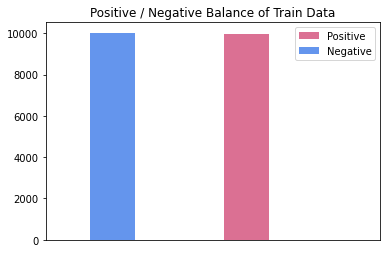

In [23]:
plt.hist(train[train.sentiment == 1].sentiment, bins = 3, label = "Positive", color ='palevioletred')  # seagreen royal blue
plt.hist(train[train.sentiment == 0].sentiment, bins = 3, color = "cornflowerblue", label = "Negative")
plt.title("Positive / Negative Balance of Train Data")
plt.xticks([])  # removes values on x axis
plt.xlim(-0.5,2)
plt.legend()
plt.show()


As we can see in the graph above, positive and negative sentiments are evenly distributed in the data.

Let's see the most common words in the word cloud.

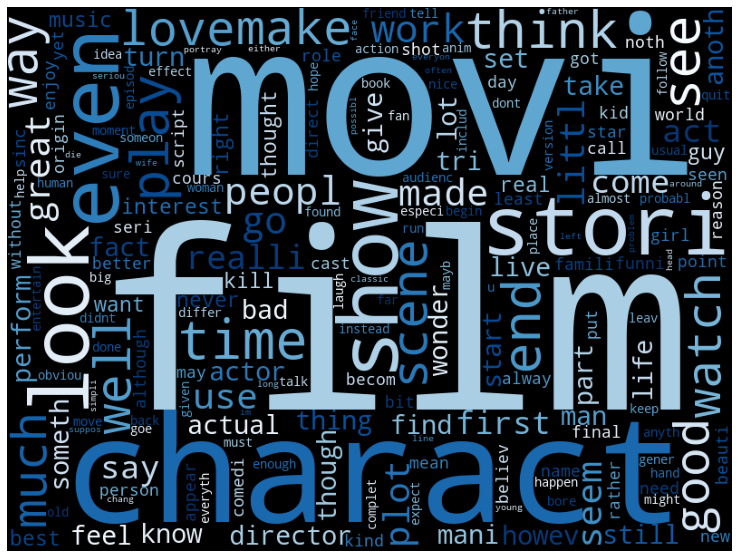

In [24]:
# WORD CLOUD FOR TRAIN DATA
cloud=WordCloud(width=800, height=600,colormap="Blues",stopwords = STOPWORDS, background_color = 'black').generate(" ".join(train['review'])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

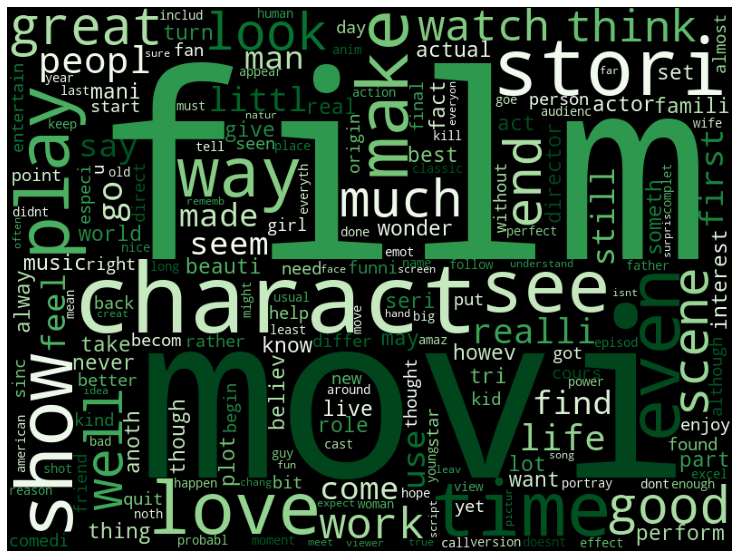

In [25]:
# Word cloud for positive labelled sentiments in train set.
train_positive = train[train.sentiment == 1]
cloud=WordCloud(width=800, height=600,colormap="Greens",stopwords = STOPWORDS, background_color = 'black').generate(" ".join(train_positive["review"])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

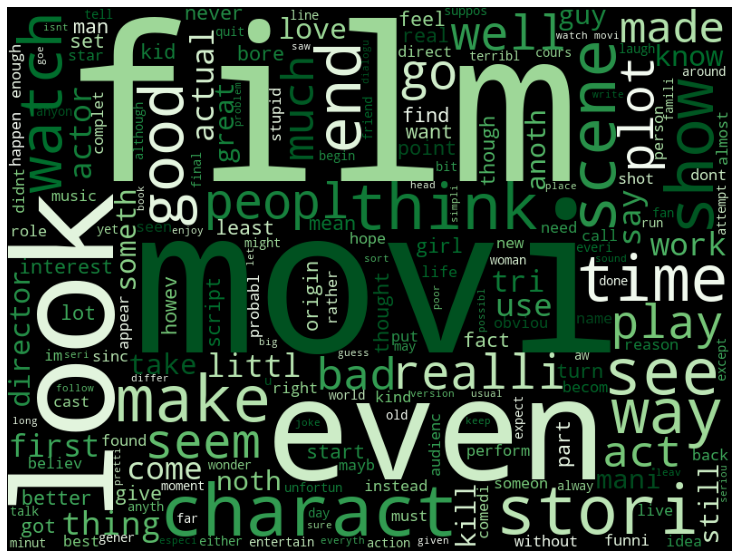

In [26]:
# Word cloud for negative sentiments in train set.
train_negative = train[train.sentiment == 0]
cloud=WordCloud(width=800, height=600,colormap="Greens",stopwords = STOPWORDS, background_color = 'black').generate(" ".join(train_negative["review"])) 
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

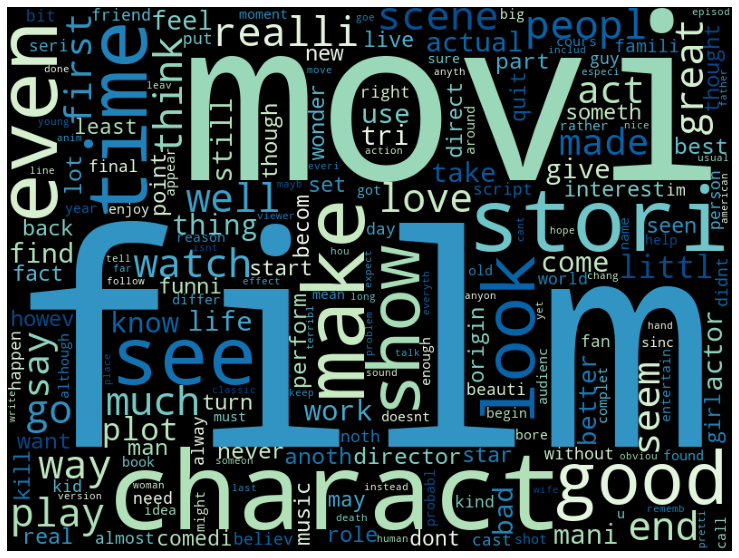

In [27]:
# WORD CLOUD FOR TEST DATA
cloud=WordCloud(width=800, height=600,colormap="GnBu",stopwords = STOPWORDS, background_color = 'black').generate(" ".join(test['review'])) 
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [28]:
# get lenght and create len_review column. and compare sentiments by lenght of reviews.
train["len_review"] = train.review.str.len()
test["len_review"] = test.review.str.len()
# number of words per review.

In [29]:
# Creaye wordn_n feature. number of words per review.
train['word_n'] = train['review'].apply(lambda x : len(x.split(' ')))
test['word_n'] = test['review'].apply(lambda x : len(x.split(' ')))

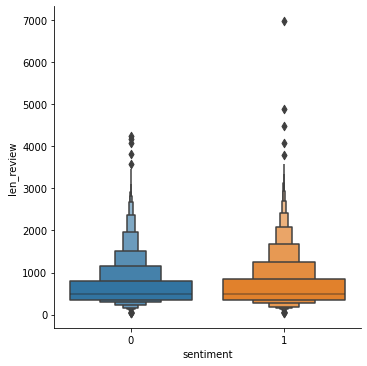

In [30]:
sns.catplot(x="sentiment", y="len_review",  kind="boxen", data=train)
plt.show()

In [31]:
print("Desc. of positive sentiments:\n",train[train.sentiment == 1].len_review.describe())

Desc. of positive sentiments:
 count    9972.000000
mean      681.810670
std       528.157907
min        35.000000
25%       352.000000
50%       499.000000
75%       838.000000
max      6969.000000
Name: len_review, dtype: float64


In [32]:
print("Desc. of negative sentiments:\n",train[train.sentiment == 0].len_review.describe())

Desc. of negative sentiments:
 count    10028.000000
mean       657.343738
std        482.829658
min         35.000000
25%        359.000000
50%        493.000000
75%        798.000000
max       4232.000000
Name: len_review, dtype: float64


Looking at the boxplot and the quarters, we can say this: There were upper outlier values in positively labeled sentiments. Could people have written longer reviews about the movies they liked?

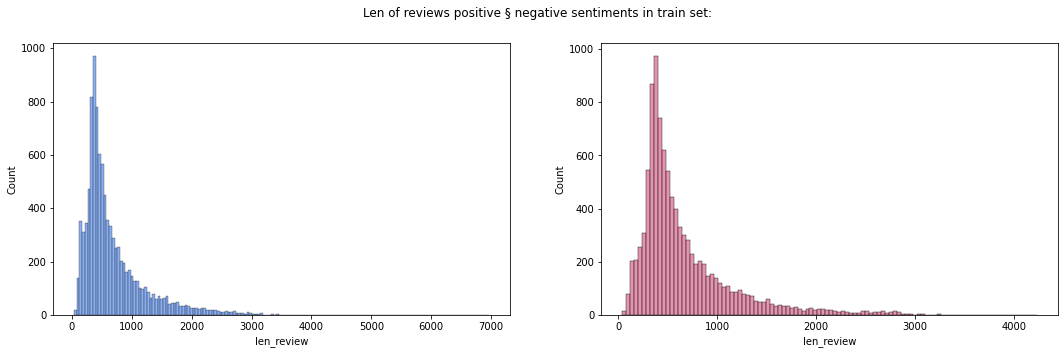

In [33]:
fig, axe = plt.subplots(1,2, figsize=(18,5))

# fig.add_subplot(1,3,1)
sns.histplot((train[train.sentiment == 1].len_review),color = "cornflowerblue",ax=axe[0])
fig.suptitle("Len of reviews positive § negative sentiments in train set: ")
# fig.add_subplot(1,2,1)

sns.histplot((train[train.sentiment == 0].len_review),color = "palevioletred", ax=axe[1])

plt.show()

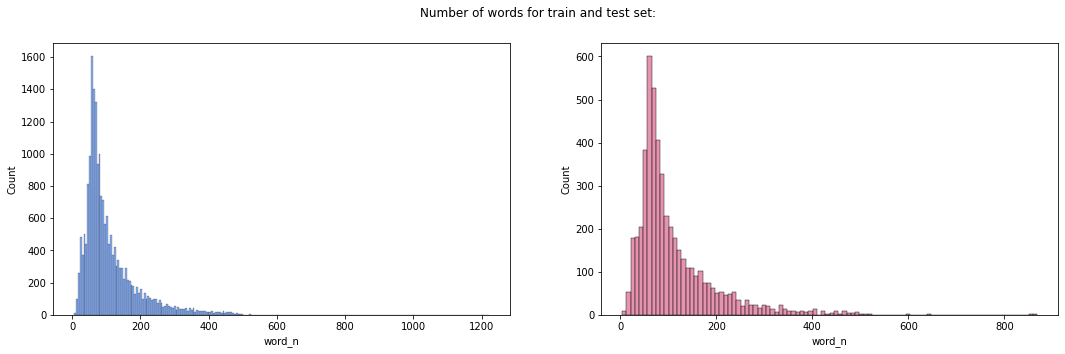

In [34]:
fig=plt.figure(figsize=(18,5))
fig.suptitle("Number of words for train and test set: ")

fig.add_subplot(1,2,1)
sns.histplot((train.word_n),color='cornflowerblue')

fig.add_subplot(1,2,2)
sns.histplot((test.word_n),color='palevioletred')

plt.show()

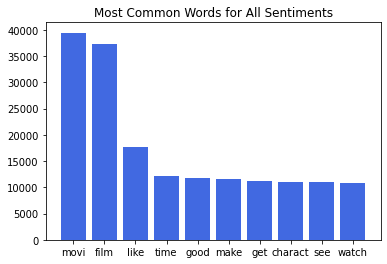

In [35]:
# Create most common words data.
most_common_words = pd.DataFrame(Counter(" ".join(train["review"]).split()).most_common(10),columns=['word','count'])
# And plot them.
plt.bar(most_common_words["word"],most_common_words["count"], color = 'royalblue')
plt.title("Most Common Words for All Sentiments")
plt.show()

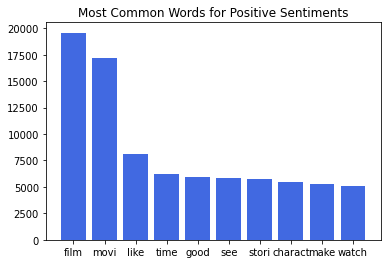

In [36]:
# Create most common words for positive sent.
most_common_words_positive = pd.DataFrame(Counter(" ".join(train[train.sentiment == 1].review).split()).most_common(10),columns=['word','count_pos'])
# Plot.
plt.bar(most_common_words_positive["word"],most_common_words_positive["count_pos"], color = 'royalblue')
plt.title("Most Common Words for Positive Sentiments")
plt.show()

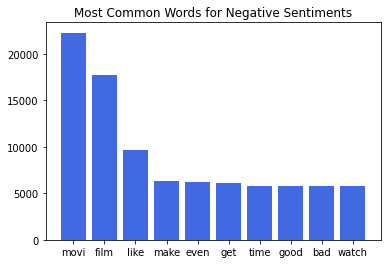

In [37]:
# Create mots common words for negative sentiments.
most_common_words_negative = pd.DataFrame(Counter(" ".join(train[train.sentiment == 0].review).split()).most_common(10),columns=['word','count_neg'])
# Plot them.
plt.bar(most_common_words_negative["word"],most_common_words_negative["count_neg"], color = 'royalblue')
plt.title("Most Common Words for Negative Sentiments")
plt.show()

In [ ]:
most_common_words = pd.DataFrame(Counter(" ".join(train[train.sentiment ==0]).review).split) #done

* Common words in positive comments: story, character, good.
* Commonly used in negative comments are: bad, even.


So users focused on them. Can these give us clues? 

## Tokenize 

We can think of it as a combination of these operations: 

tokenize = 
- word.replace(".","")
- word.replace(",","")
- word.replace("'","")
- word.lower()
- word.split()
           

Actually, this is not as complicated as it seems. 

**Before tokenize:**

    word = How are you doing today?
    
    
**After tokenize:** 

    word ='how', 'are','you','today','?'

for more info: https://developers.google.com/machine-learning/guides/text-classification/step-3

In [38]:
tokenizer = RegexpTokenizer(r'\w+')

train['tokens'] = train['review'].apply(tokenizer.tokenize)
test['tokens'] = test['review'].apply(tokenizer.tokenize)

## Vectorize

Define a good numerical measure to characterize these texts.

In [39]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w+')  

In [64]:
tfidf = dict()
tfidf['all_train'] = (tfidf_vectorizer.fit_transform(train['review']))
tfidf['test'] = (tfidf_vectorizer.transform(test['review']))
print(tfidf['all_train'].shape)
print(tfidf['test'].shape)
# max_features ver.

(20000, 68436)
(5000, 68436)


# Model

In [41]:
test["sentiment"].reset_index()

,index,sentiment
0,20000,0
1,20001,1
2,20002,1
3,20003,1
4,20004,0
...,...,...
4995,24995,0
4996,24996,0
4997,24997,0
4998,24998,0


In [42]:
classifier = LogisticRegression()

train_target = train['sentiment']
classifier.fit(tfidf['all_train'], train_target)   #  tfidf['all_train'] = x_train,  train_target = y_train

prediction_df = pd.DataFrame.from_dict({'id': test['id']})
lr_predict = classifier.predict(tfidf['test'])    # tfidf[test] = x_test

In [43]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(test["sentiment"], lr_predict)*100)

Logistic Regression Accuracy: 87.82


In [44]:
cm=confusion_matrix(test["sentiment"],lr_predict)
cm

array([[2154,  318],
       [ 291, 2237]])

**Next Steps:**

- Types of movies can be added as columns.

- Lemmatization can be done. 

**ROC**

In [62]:
metrics.plot_roc_curve(classifier, test["sentiment"], lr_predict.to_DataFrame) 

AttributeError: 'numpy.ndarray' object has no attribute 'to_DataFrame'